#Importing Libraries and Loading Files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Data Science/company's projects/Hackathin/train.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
0,CusID_00126,22.0,Male,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,New_UI
1,CusID_00927,NaN,Female,Budapest,Central Hungary,9.0,2018-05-21,2020-01-26,0,6.115229,2.363926,6.968752,7.355854,8.561461,2.162229,Old_UI
2,CusID_01646,26.0,Male,Mumbai,Maharashtra,NaN,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,New_UI
3,CusID_06228,NaN,Male,San Francisco,California,7.0,2019-07-18,2020-11-16,0,2.116475,9.064060,5.387599,NaN,0.459090,7.343461,New_UI
4,CusID_04239,29.0,Female,Taipei,Taiwan,NaN,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,Old_UI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              15150 non-null  object 
 1   Age                     14147 non-null  float64
 2   Gender                  15150 non-null  object 
 3   City                    15150 non-null  object 
 4   State                   15150 non-null  object 
 5   No_of_orders_placed     14377 non-null  float64
 6   Sign_up_date            15150 non-null  object 
 7   Last_order_placed_date  15150 non-null  object 
 8   is_premium_member       15150 non-null  int64  
 9   Women’s_Clothing        15150 non-null  float64
 10  Men’s_Clothing          15150 non-null  float64
 11  Kid’s_Clothing          14215 non-null  float64
 12  Home_&_Living           14302 non-null  float64
 13  Beauty                  15150 non-null  float64
 14  Electronics             15150 non-null

In [5]:
df.describe()

,Age,No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics
count,14147.000000,14377.000000,15150.000000,15150.000000,15150.000000,14215.000000,14302.000000,15150.000000,15150.000000
mean,28.356613,8.200876,0.323828,1.848024,4.464372,4.573373,4.576805,4.069482,2.830962
std,7.563249,3.606418,0.467951,12.814344,2.979838,2.628990,2.380538,3.808290,13.056017
min,15.000000,0.000000,0.000000,-99.000000,-1.000000,-3.000000,-2.000000,-20.114294,-99.000000
25%,22.000000,5.000000,0.000000,1.301135,2.019508,2.602179,2.817589,1.135181,2.472861
50%,29.000000,8.000000,0.000000,3.305220,3.603376,4.826021,4.338659,2.914518,4.602270
75%,33.000000,10.000000,1.000000,6.656113,7.595931,6.482865,6.532475,7.634503,7.872561
max,50.000000,15.000000,1.000000,9.998061,9.999751,9.997132,9.993163,26.564845,9.999038


#Checking Missing Values

In [6]:
df.shape

(15150, 16)

In [7]:
df.isnull().sum()

CustomerID                   0
Age                       1003
Gender                       0
City                         0
State                        0
No_of_orders_placed        773
Sign_up_date                 0
Last_order_placed_date       0
is_premium_member            0
Women’s_Clothing             0
Men’s_Clothing               0
Kid’s_Clothing             935
Home_&_Living              848
Beauty                       0
Electronics                  0
Preferred_Theme              0
dtype: int64

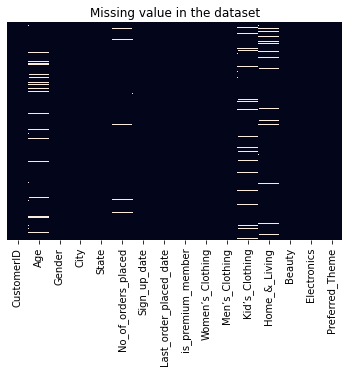

In [8]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)
plt.title('Missing value in the dataset');

Shape of dataframe is (15150, 16) 

"Age","No_of_orders_placed","Kid’s_Clothing","Home_&_Living" Have null Values.

As We can see, We have large amount of missing values, If we will Replace it with mean , median or mode. Replaced values could be wrong and can affect out Model.

Trial-We drop all the null values, if it will decrease the shape of dataframe. So dropping method will be canceled and we will find other way.

In [9]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'State', 'No_of_orders_placed',
       'Sign_up_date', 'Last_order_placed_date', 'is_premium_member',
       'Women’s_Clothing', 'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living',
       'Beauty', 'Electronics', 'Preferred_Theme'],
      dtype='object')

In [10]:
df1=df.copy()
df1.dropna(inplace=True)

In [11]:
df1.shape

(11978, 16)

We have lost 3172 rows. This is not effective for our dataset. 

Let's See other say to handle Missing values

## Null Values of Age

In [12]:
df.shape

(15150, 16)

Let's have a look on "Age" Column

In [13]:
df["Age"].unique()

array([22., nan, 26., 29., 28., 16., 24., 25., 43., 31., 23., 33., 34.,
       48., 45., 46., 17., 37., 35., 21., 41., 27., 44., 38., 18., 36.,
       32., 40., 15., 20., 39., 42., 30., 50., 19., 47., 49.])

In [14]:
age_count=df.Age.value_counts()

In [15]:
df.Preferred_Theme.value_counts()

New_UI    7674
Old_UI    7476
Name: Preferred_Theme, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender_encoded = le.fit_transform(df['Preferred_Theme'])
print(gender_encoded)
df['Preferred_Theme'] = gender_encoded

[0 1 0 ... 1 0 1]


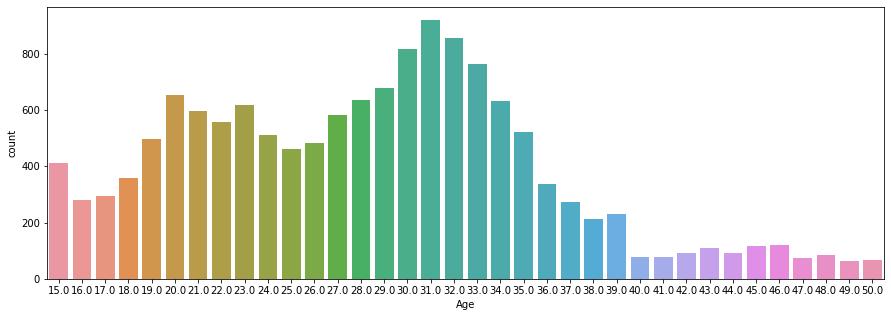

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(df["Age"])

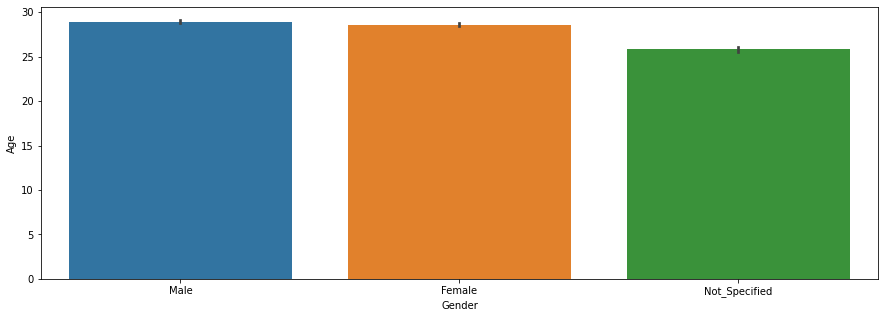

In [18]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Gender", y="Age", data=df)

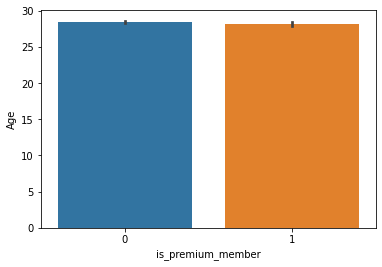

In [19]:
ax = sns.barplot(x="is_premium_member", y="Age", data=df)

In [20]:
df.corr()

,Age,No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
Age,1.000000,-0.016666,-0.021690,0.002312,0.038691,0.182828,0.021876,-0.007216,0.008207,0.097226
No_of_orders_placed,-0.016666,1.000000,0.446155,-0.003158,-0.076477,0.067872,-0.089656,-0.026812,0.001923,0.194023
is_premium_member,-0.021690,0.446155,1.000000,-0.007042,-0.148171,0.112729,-0.082470,0.000981,-0.015056,0.211341
Women’s_Clothing,0.002312,-0.003158,-0.007042,1.000000,-0.099659,0.089509,0.108269,0.108428,-0.032547,0.037655
Men’s_Clothing,0.038691,-0.076477,-0.148171,-0.099659,1.000000,-0.378626,-0.427947,-0.426616,0.117613,-0.241967
Kid’s_Clothing,0.182828,0.067872,0.112729,0.089509,-0.378626,1.000000,0.332990,0.321597,-0.074287,0.269005
Home_&_Living,0.021876,-0.089656,-0.082470,0.108269,-0.427947,0.332990,1.000000,0.468343,-0.109866,0.207761
Beauty,-0.007216,-0.026812,0.000981,0.108428,-0.426616,0.321597,0.468343,1.000000,-0.098402,0.203064
Electronics,0.008207,0.001923,-0.015056,-0.032547,0.117613,-0.074287,-0.109866,-0.098402,1.000000,-0.046982
Preferred_Theme,0.097226,0.194023,0.211341,0.037655,-0.241967,0.269005,0.207761,0.203064,-0.046982,1.000000


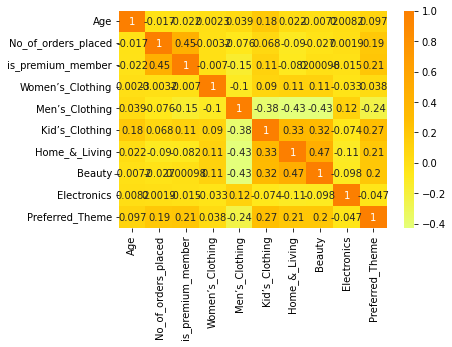

In [21]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

As we can see that Age is not correlated with other columns and we can't replace it with mean , mode and median . So it is better to drop the missing values in Age.


In [22]:
df.dropna(subset=['Age'],inplace=True)

In [23]:
df.isnull().sum()

CustomerID                  0
Age                         0
Gender                      0
City                        0
State                       0
No_of_orders_placed       696
Sign_up_date                0
Last_order_placed_date      0
is_premium_member           0
Women’s_Clothing            0
Men’s_Clothing              0
Kid’s_Clothing            867
Home_&_Living             772
Beauty                      0
Electronics                 0
Preferred_Theme             0
dtype: int64

## Null Values of No_of_orders_placed

In [24]:
df.head()

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
0,CusID_00126,22.0,Male,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,0
2,CusID_01646,26.0,Male,Mumbai,Maharashtra,NaN,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,0
4,CusID_04239,29.0,Female,Taipei,Taiwan,NaN,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,1
5,CusID_01061,28.0,Not_Specified,Bercelona,Catalonia,15.0,2019-06-22,2021-07-18,1,3.413308,3.639450,7.809194,1.315751,5.043577,3.412935,1
6,CusID_05227,16.0,Not_Specified,Kolkata,West Bengal,14.0,2018-10-14,2020-01-07,1,3.661765,4.578713,8.769436,5.399277,4.363722,3.881251,1


In [25]:
df.No_of_orders_placed.value_counts()

10.0    2295
3.0     1583
7.0     1274
4.0     1055
8.0     1023
6.0      977
9.0      935
5.0      895
14.0     869
12.0     811
11.0     588
15.0     538
13.0     459
0.0       60
1.0       57
2.0       32
Name: No_of_orders_placed, dtype: int64

In [26]:
df.No_of_orders_placed.value_counts()

10.0    2295
3.0     1583
7.0     1274
4.0     1055
8.0     1023
6.0      977
9.0      935
5.0      895
14.0     869
12.0     811
11.0     588
15.0     538
13.0     459
0.0       60
1.0       57
2.0       32
Name: No_of_orders_placed, dtype: int64

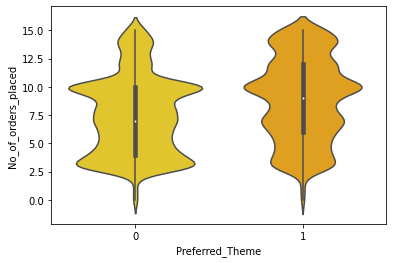

In [27]:
sns.violinplot(x='Preferred_Theme', y='No_of_orders_placed',data=df,palette='Wistia')

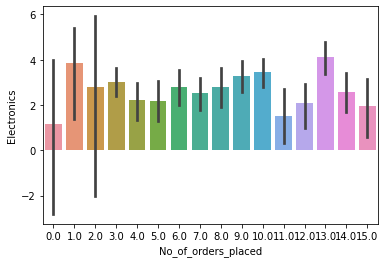

In [28]:
ax = sns.barplot(x="No_of_orders_placed", y="Electronics", data=df)

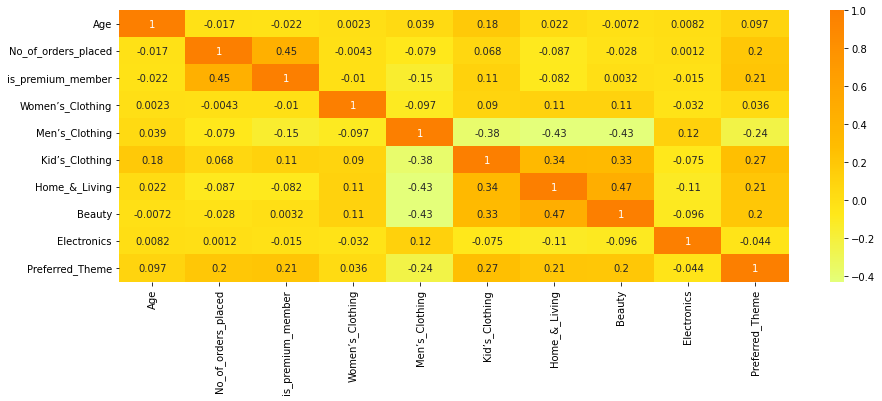

In [29]:
plt.figure(figsize=(15,5))
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [30]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'State', 'No_of_orders_placed',
       'Sign_up_date', 'Last_order_placed_date', 'is_premium_member',
       'Women’s_Clothing', 'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living',
       'Beauty', 'Electronics', 'Preferred_Theme'],
      dtype='object')

We can se that  'is_premium_member', 'Preferred_Theme' are highly correlated, so i am choosing these two columns for prediciting values.

In [31]:
cols = ['No_of_orders_placed', 'is_premium_member', 'Preferred_Theme']
df1 = df[cols]
df1

,No_of_orders_placed,is_premium_member,Preferred_Theme
0,4.0,0,0
2,NaN,0,0
4,NaN,0,1
5,15.0,1,1
6,14.0,1,1
...,...,...,...
15145,6.0,0,1
15146,8.0,0,0
15147,7.0,1,1
15148,10.0,0,0


In [32]:
test_df=df1[df1["No_of_orders_placed"].isnull()]
print(test_df.shape)
df1.head()

(696, 3)


,No_of_orders_placed,is_premium_member,Preferred_Theme
0,4.0,0,0
2,NaN,0,0
4,NaN,0,1
5,15.0,1,1
6,14.0,1,1


In [33]:
df1=df1.dropna()

In [34]:
y_train=df1["No_of_orders_placed"]
x_train=df1.drop("No_of_orders_placed",axis=1)
x_test=test_df.drop("No_of_orders_placed",axis=1)

In [35]:
y_train

0         4.0
5        15.0
6        14.0
7         5.0
10       15.0
         ... 
15145     6.0
15146     8.0
15147     7.0
15148    10.0
15149     1.0
Name: No_of_orders_placed, Length: 13451, dtype: float64

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [37]:
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
df.loc[df.No_of_orders_placed.isnull(),"No_of_orders_placed"]=y_pred


To Handle "No_of_orders_placed" I have used decision tree to predict the missing values.

## Null Values of Kid's_clothing

In [38]:
df.isnull().sum()

CustomerID                  0
Age                         0
Gender                      0
City                        0
State                       0
No_of_orders_placed         0
Sign_up_date                0
Last_order_placed_date      0
is_premium_member           0
Women’s_Clothing            0
Men’s_Clothing              0
Kid’s_Clothing            867
Home_&_Living             772
Beauty                      0
Electronics                 0
Preferred_Theme             0
dtype: int64

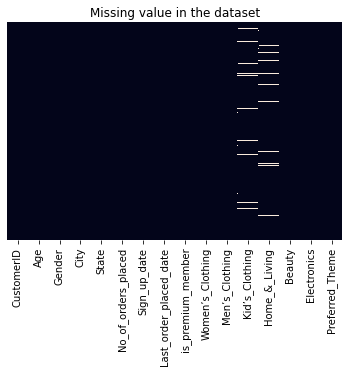

In [39]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)
plt.title('Missing value in the dataset');

Let's handle these both columns by predicting missing values with Decision Tree.

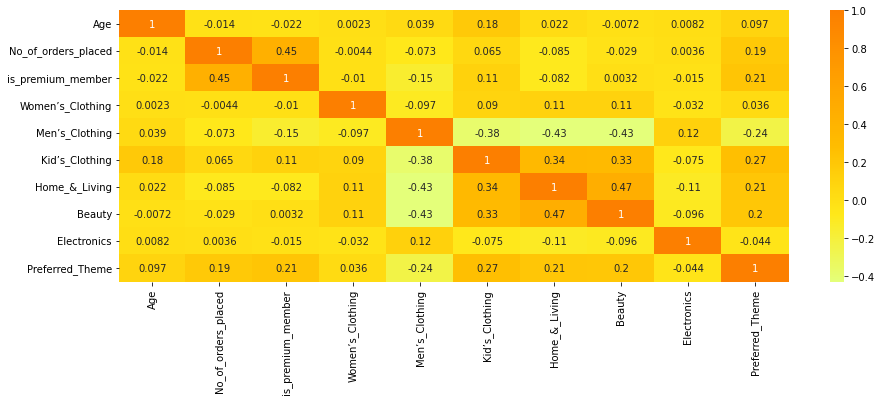

In [40]:
plt.figure(figsize=(15,5))
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender_encoded = le.fit_transform(df['Preferred_Theme'])
print(gender_encoded)
df['Preferred_Theme'] = gender_encoded

[0 0 1 ... 1 0 1]


In [42]:
cols = ["Age",'No_of_orders_placed', 'Men’s_Clothing', 'Preferred_Theme',"Kid’s_Clothing"]
df1 = df[cols]

In [43]:
test_df=df1[df1["Kid’s_Clothing"].isnull()]
print(test_df.shape)

(867, 5)


In [44]:
df1=df1.dropna()

In [45]:
y_train=df1["Kid’s_Clothing"]
x_train=df1.drop("Kid’s_Clothing",axis=1)
x_test=test_df.drop("Kid’s_Clothing",axis=1)

In [46]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()

In [47]:
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
df.loc[df["Kid’s_Clothing"].isnull(),"Kid’s_Clothing"]=y_pred

In [48]:
df.isnull().sum()

CustomerID                  0
Age                         0
Gender                      0
City                        0
State                       0
No_of_orders_placed         0
Sign_up_date                0
Last_order_placed_date      0
is_premium_member           0
Women’s_Clothing            0
Men’s_Clothing              0
Kid’s_Clothing              0
Home_&_Living             772
Beauty                      0
Electronics                 0
Preferred_Theme             0
dtype: int64

##Null Value of Home_&_Living

In [49]:
df["Home_&_Living"].value_counts()

2.000000    194
3.000000    178
1.000000    139
4.000000     56
0.000000     25
           ... 
7.648900      1
1.927004      1
2.008576      1
1.923624      1
3.103405      1
Name: Home_&_Living, Length: 12762, dtype: int64

In [50]:
df["Home_&_Living"].mean()

4.5683905630484425

In [51]:
df["Home_&_Living"].mode()

0    2.0
dtype: float64

In Home_&_Living, as we can see Home_&_Living is float type, We can replace null values with mean bt we got 4.56 mean and maximum values are around 1-3, so it will miss up accuracy But as i got value of mode 2 but it doesn't make any sense to replace float values with mode. So we will replace null values with predicted values.

In [52]:
cols = ["Age",'No_of_orders_placed', 'Men’s_Clothing', 'Preferred_Theme',"Home_&_Living"]
df1 = df[cols]

In [53]:
test_df=df1[df1["Home_&_Living"].isnull()]
print(test_df.shape)

(772, 5)


In [54]:
df1=df1.dropna()

In [55]:
y_train=df1["Home_&_Living"]
x_train=df1.drop("Home_&_Living",axis=1)
x_test=test_df.drop("Home_&_Living",axis=1)

In [56]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()

In [57]:
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
df.loc[df["Home_&_Living"].isnull(),"Home_&_Living"]=y_pred

In [58]:
df.isnull().sum()

CustomerID                0
Age                       0
Gender                    0
City                      0
State                     0
No_of_orders_placed       0
Sign_up_date              0
Last_order_placed_date    0
is_premium_member         0
Women’s_Clothing          0
Men’s_Clothing            0
Kid’s_Clothing            0
Home_&_Living             0
Beauty                    0
Electronics               0
Preferred_Theme           0
dtype: int64

In [59]:
df

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
0,CusID_00126,22.0,Male,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,0
2,CusID_01646,26.0,Male,Mumbai,Maharashtra,10.0,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,0
4,CusID_04239,29.0,Female,Taipei,Taiwan,10.0,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,1
5,CusID_01061,28.0,Not_Specified,Bercelona,Catalonia,15.0,2019-06-22,2021-07-18,1,3.413308,3.639450,7.809194,1.315751,5.043577,3.412935,1
6,CusID_05227,16.0,Not_Specified,Kolkata,West Bengal,14.0,2018-10-14,2020-01-07,1,3.661765,4.578713,8.769436,5.399277,4.363722,3.881251,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,CusID_01855,28.0,Not_Specified,Kolkata,New South Wales,6.0,2017-11-18,2020-07-24,0,1.074235,3.328216,9.075440,5.929733,2.081818,4.225626,1
15146,CusID_08497,25.0,Male,Sydney,New South Wales,8.0,2017-09-26,2020-03-11,0,0.604496,6.349027,0.413908,4.159025,1.214793,8.482181,0
15147,CusID_01667,32.0,Female,San Francisco,Singapore,7.0,2018-06-09,2021-04-05,1,3.812781,2.869684,6.213548,6.279680,7.477459,2.861971,1
15148,CusID_09014,32.0,Female,Sydney,New Delhi,10.0,2016-01-23,2020-08-23,0,4.607484,1.370857,6.108666,7.324654,7.748538,5.009866,0


#Feature Engineering

In [60]:
df.head()

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
0,CusID_00126,22.0,Male,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,0
2,CusID_01646,26.0,Male,Mumbai,Maharashtra,10.0,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,0
4,CusID_04239,29.0,Female,Taipei,Taiwan,10.0,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,1
5,CusID_01061,28.0,Not_Specified,Bercelona,Catalonia,15.0,2019-06-22,2021-07-18,1,3.413308,3.639450,7.809194,1.315751,5.043577,3.412935,1
6,CusID_05227,16.0,Not_Specified,Kolkata,West Bengal,14.0,2018-10-14,2020-01-07,1,3.661765,4.578713,8.769436,5.399277,4.363722,3.881251,1


In [61]:
df.Sign_up_date.value_counts()

2017-06-23    396
?             147
2019-06-02     45
2016-03-03     41
2016-06-03     36
             ... 
2017-03-08      1
2018-09-01      1
2016-10-28      1
2018-09-07      1
2018-04-03      1
Name: Sign_up_date, Length: 1455, dtype: int64

In Sign_up_date has 147 unwanted string so we are dropping that rows.

In [62]:
df=df[df.Sign_up_date != '?']

In [63]:
df.Sign_up_date.value_counts()

2017-06-23    396
2019-06-02     45
2016-03-03     41
2016-06-03     36
2017-11-03     33
             ... 
2017-03-08      1
2019-05-12      1
2016-10-28      1
2018-09-07      1
2018-04-03      1
Name: Sign_up_date, Length: 1454, dtype: int64

In [64]:
df["Sign_up_date"] = pd.to_datetime(df["Sign_up_date"], 
 format = "%Y-%m-%d", 
 errors = "coerce")

In [65]:
df["Last_order_placed_date"] = pd.to_datetime(df["Last_order_placed_date"], 
 format = "%Y-%m-%d", 
 errors = "coerce")

In [66]:
df["Total_days"]=df["Last_order_placed_date"]-df["Sign_up_date"]

We are creating a column which have total number of days between sign up date and Last order placed date.

Creating the columns of years of Sign_up_date and Last_order_placed_date.

In [67]:
df["Sign_up_year"]=df["Sign_up_date"].dt.year
df["Sign_up_month"]=df["Last_order_placed_date"].dt.month_name()
df["Last_order_year"]=df["Last_order_placed_date"].dt.year
df["Last_order_placed_month"]=df["Last_order_placed_date"].dt.month_name()

I have Created these columns for EDA, Let's see how can they help us.

In [68]:
df.head()

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,...,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme,Total_days,Sign_up_year,Sign_up_month,Last_order_year,Last_order_placed_month
0,CusID_00126,22.0,Male,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,...,2.000000,2.325376,1.924891,9.820254,0,1378 days,2017,April,2021,April
2,CusID_01646,26.0,Male,Mumbai,Maharashtra,10.0,2019-02-15,2020-11-28,0,1.000000,...,1.766530,3.471802,0.808147,9.055563,0,652 days,2019,November,2020,November
4,CusID_04239,29.0,Female,Taipei,Taiwan,10.0,2018-02-05,2020-03-12,0,7.352878,...,2.676853,7.159554,8.184695,2.000000,1,766 days,2018,March,2020,March
5,CusID_01061,28.0,Not_Specified,Bercelona,Catalonia,15.0,2019-06-22,2021-07-18,1,3.413308,...,7.809194,1.315751,5.043577,3.412935,1,757 days,2019,July,2021,July
6,CusID_05227,16.0,Not_Specified,Kolkata,West Bengal,14.0,2018-10-14,2020-01-07,1,3.661765,...,8.769436,5.399277,4.363722,3.881251,1,450 days,2018,January,2020,January


#EDA

In [69]:
df.head()

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,...,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme,Total_days,Sign_up_year,Sign_up_month,Last_order_year,Last_order_placed_month
0,CusID_00126,22.0,Male,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,...,2.000000,2.325376,1.924891,9.820254,0,1378 days,2017,April,2021,April
2,CusID_01646,26.0,Male,Mumbai,Maharashtra,10.0,2019-02-15,2020-11-28,0,1.000000,...,1.766530,3.471802,0.808147,9.055563,0,652 days,2019,November,2020,November
4,CusID_04239,29.0,Female,Taipei,Taiwan,10.0,2018-02-05,2020-03-12,0,7.352878,...,2.676853,7.159554,8.184695,2.000000,1,766 days,2018,March,2020,March
5,CusID_01061,28.0,Not_Specified,Bercelona,Catalonia,15.0,2019-06-22,2021-07-18,1,3.413308,...,7.809194,1.315751,5.043577,3.412935,1,757 days,2019,July,2021,July
6,CusID_05227,16.0,Not_Specified,Kolkata,West Bengal,14.0,2018-10-14,2020-01-07,1,3.661765,...,8.769436,5.399277,4.363722,3.881251,1,450 days,2018,January,2020,January


Text(0.5, 1.0, 'charges according to sex')

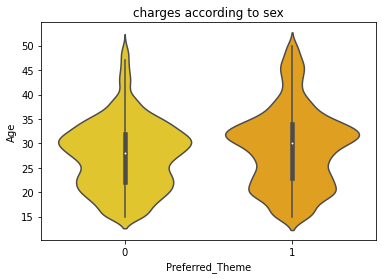

In [70]:
sns.violinplot(x='Preferred_Theme', y='Age',data=df,palette='Wistia')
plt.title("charges according to sex")

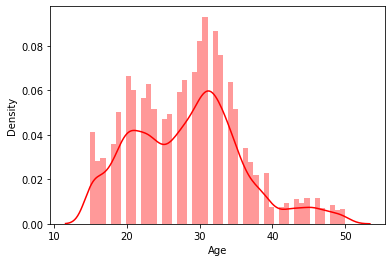

In [71]:
sns.distplot(df1["Age"],bins=50,color="r")

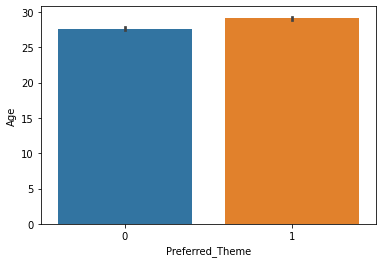

In [72]:
sns.barplot(df['Preferred_Theme'],df['Age'])

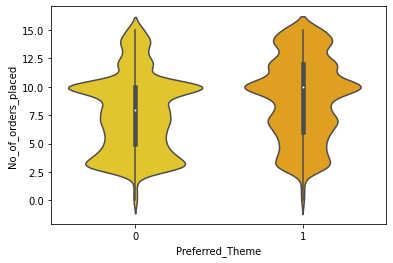

In [73]:
sns.violinplot(x='Preferred_Theme', y='No_of_orders_placed',data=df,palette='Wistia')

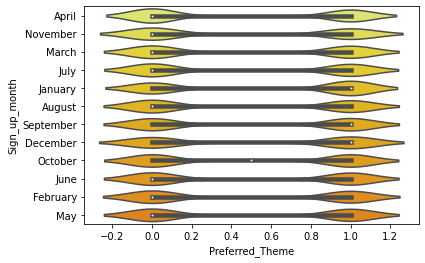

In [74]:
sns.violinplot(x='Preferred_Theme', y='Sign_up_month',data=df,palette='Wistia')

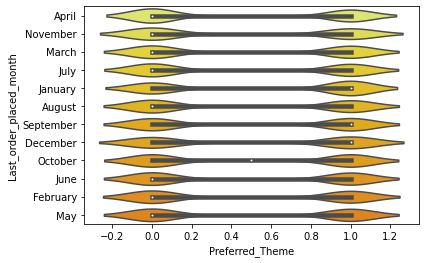

In [75]:
sns.violinplot(x='Preferred_Theme', y='Last_order_placed_month',data=df,palette='Wistia')

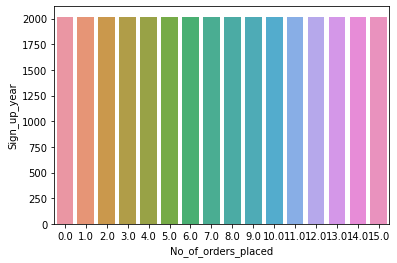

In [76]:
sns.barplot(df['No_of_orders_placed'],df['Sign_up_year'])

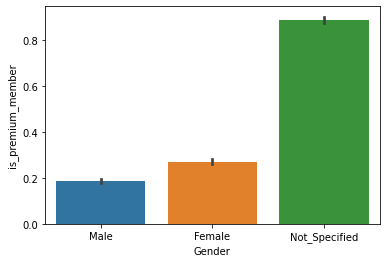

In [77]:
sns.barplot(df['Gender'],df['is_premium_member'])

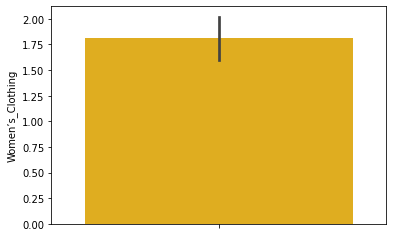

In [78]:
# sns.barplot(df['No_of_orders_placed'],df['Women’s_Clothing'])
sns.barplot(y='Women’s_Clothing',data=df,palette='Wistia')

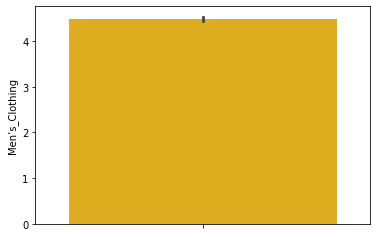

In [79]:
sns.barplot(y='Men’s_Clothing',data=df,palette='Wistia')

## **Let's Check Outliers**

In [80]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'State', 'No_of_orders_placed',
       'Sign_up_date', 'Last_order_placed_date', 'is_premium_member',
       'Women’s_Clothing', 'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living',
       'Beauty', 'Electronics', 'Preferred_Theme', 'Total_days',
       'Sign_up_year', 'Sign_up_month', 'Last_order_year',
       'Last_order_placed_month'],
      dtype='object')

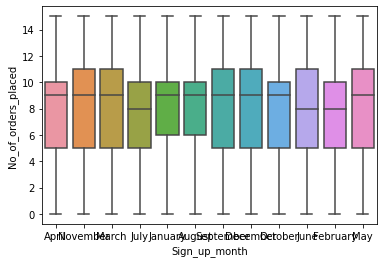

In [81]:
ax = sns.boxplot(x="Sign_up_month", y="No_of_orders_placed", data=df)

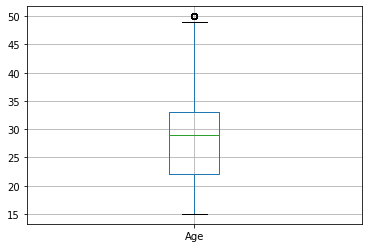

In [82]:
figure=df.boxplot(column="Age")


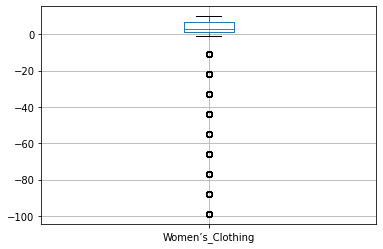

In [83]:
figure=df.boxplot(column="Women’s_Clothing")

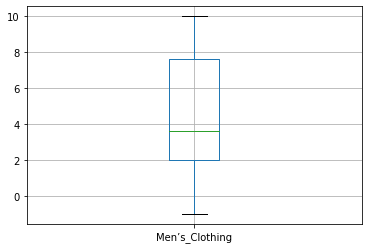

In [84]:
figure=df.boxplot(column="Men’s_Clothing")

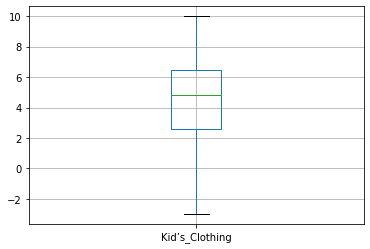

In [85]:
figure=df.boxplot(column="Kid’s_Clothing")

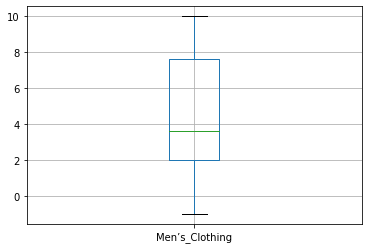

In [86]:
figure=df.boxplot(column="Men’s_Clothing")

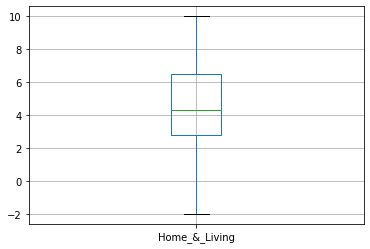

In [87]:
figure=df.boxplot(column="Home_&_Living")

In [88]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'State', 'No_of_orders_placed',
       'Sign_up_date', 'Last_order_placed_date', 'is_premium_member',
       'Women’s_Clothing', 'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living',
       'Beauty', 'Electronics', 'Preferred_Theme', 'Total_days',
       'Sign_up_year', 'Sign_up_month', 'Last_order_year',
       'Last_order_placed_month'],
      dtype='object')

**Obervation**

1.Mostly customers are of age 30-32.

2.large number of order_placed are 10, May be there is discount offer on 10 
items or may be something else.

3.There is no relation of order_placed and months.

4.There is no relation of signed_up and months.

5.As we can see in boxplots, We have some outliers in "Age" and "Women's_Clothing"  but they have important informations about product. So we are not removing them.

6.Maximum number of customers are of age between 29-33.


#Feature Selection

As we will select the Features based on Correlations.

In [89]:
df["Total_days"]=df.Total_days.dt.days


In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
gender_encoded = le.fit_transform(df['Gender'])
df['Gender'] = gender_encoded

gender_encoded = le.fit_transform(df['City'])
df['City'] = gender_encoded

gender_encoded = le.fit_transform(df['State'])
df['State'] = gender_encoded

gender_encoded = le.fit_transform(df['Sign_up_month'])
df['Sign_up_month'] = gender_encoded

In [91]:
gender_encoded = le.fit_transform(df['is_premium_member'])
df['is_premium_member'] = gender_encoded

In [92]:
df.head()

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,...,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme,Total_days,Sign_up_year,Sign_up_month,Last_order_year,Last_order_placed_month
0,CusID_00126,22.0,1,21,2,4.0,2017-06-23,2021-04-01,0,2.945701,...,2.000000,2.325376,1.924891,9.820254,0,1378,2017,0,2021,April
2,CusID_01646,26.0,1,11,8,10.0,2019-02-15,2020-11-28,0,1.000000,...,1.766530,3.471802,0.808147,9.055563,0,652,2019,9,2020,November
4,CusID_04239,29.0,0,19,14,10.0,2018-02-05,2020-03-12,0,7.352878,...,2.676853,7.159554,8.184695,2.000000,1,766,2018,7,2020,March
5,CusID_01061,28.0,2,1,4,15.0,2019-06-22,2021-07-18,1,3.413308,...,7.809194,1.315751,5.043577,3.412935,1,757,2019,5,2021,July
6,CusID_05227,16.0,2,7,19,14.0,2018-10-14,2020-01-07,1,3.661765,...,8.769436,5.399277,4.363722,3.881251,1,450,2018,4,2020,January


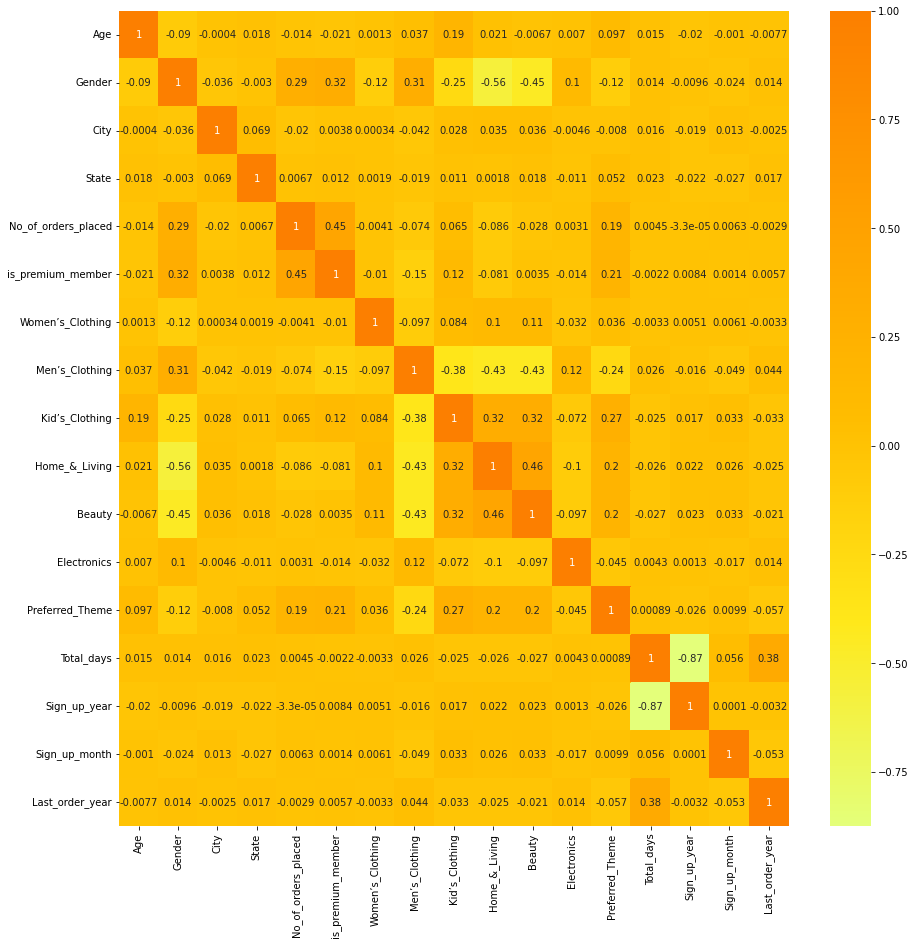

In [93]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [94]:
df=df[[ 'Age', 'Gender',  'No_of_orders_placed','is_premium_member','Women’s_Clothing', 'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living','Beauty', 'Electronics', 'Preferred_Theme']]

In [95]:
# df=df[[ 'Age', 'Gender',  'No_of_orders_placed','is_premium_member', 'Home_&_Living','Beauty', 'Electronics', 'Preferred_Theme']]

In [96]:
df.columns

Index(['Age', 'Gender', 'No_of_orders_placed', 'is_premium_member',
       'Women’s_Clothing', 'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living',
       'Beauty', 'Electronics', 'Preferred_Theme'],
      dtype='object')

#Models

In [97]:
X = df.drop('Preferred_Theme',axis=1) # Independet variable
y = df['Preferred_Theme'] # dependent variable

In [100]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.6096428571428572


Decision Tree with Cross-Validation

In [122]:
accuracies= cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracies= cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 67.09%
Standard Deviation is 0.92%


Support Vector Machine

In [123]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [124]:
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1400
           1       0.67      0.68      0.68      1400

    accuracy                           0.67      2800
   macro avg       0.67      0.67      0.67      2800
weighted avg       0.67      0.67      0.67      2800

[[937 463]
 [449 951]]


Support Vector Machine with Cross-validation

In [133]:
accuracies= cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracies= cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 67.09%
Standard Deviation is 0.92%


Naive Bays

In [126]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [127]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      1400
           1       0.66      0.72      0.69      1400

    accuracy                           0.68      2800
   macro avg       0.68      0.68      0.68      2800
weighted avg       0.68      0.68      0.68      2800

[[ 892  508]
 [ 393 1007]]


In [128]:
accuracies= cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracies= cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 67.09%
Standard Deviation is 0.92%


KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

[1 0 0 ... 0 1 1]


In [130]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6957142857142857


XG Boost

In [110]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [111]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [112]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [113]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.71%


Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
classifir_lr=LogisticRegression(random_state=0)# here we are succefull created a instance of the class
classifir_lr.fit(X_train,y_train)
y_pred=classifir_lr.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [115]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

In [116]:
results=pd.DataFrame([['Logistic Regression',acc,f1,prec,rec]],
                    columns=['Model','Accuracy','f1 score','precision','recall'])

In [117]:
results

,Model,Accuracy,f1 score,precision,recall
0,Logistic Regression,0.678214,0.679245,0.677076,0.681429


In [120]:
accuracies= cross_val_score(estimator=classifir_lr,X=X_train,y=y_train,cv=10)

In [121]:
accuracies= cross_val_score(estimator=classifir_lr,X=X_train,y=y_train,cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 67.02%
Standard Deviation is 1.23%


## **We can see that KNN and XG Boost Giving us the best result with approx 69% of Accuracy.**